In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

In [2]:
IMG_DATA_DIR = "/kaggle/input/fake-news-detection-bilingual-multimodel-fusion/news_dataset/for_image"

TXT_DATA_PATH = '/kaggle/input/extracted-text-data/extracted_text_data_largedata (9.9k).csv'

## Image Distribution Analysis

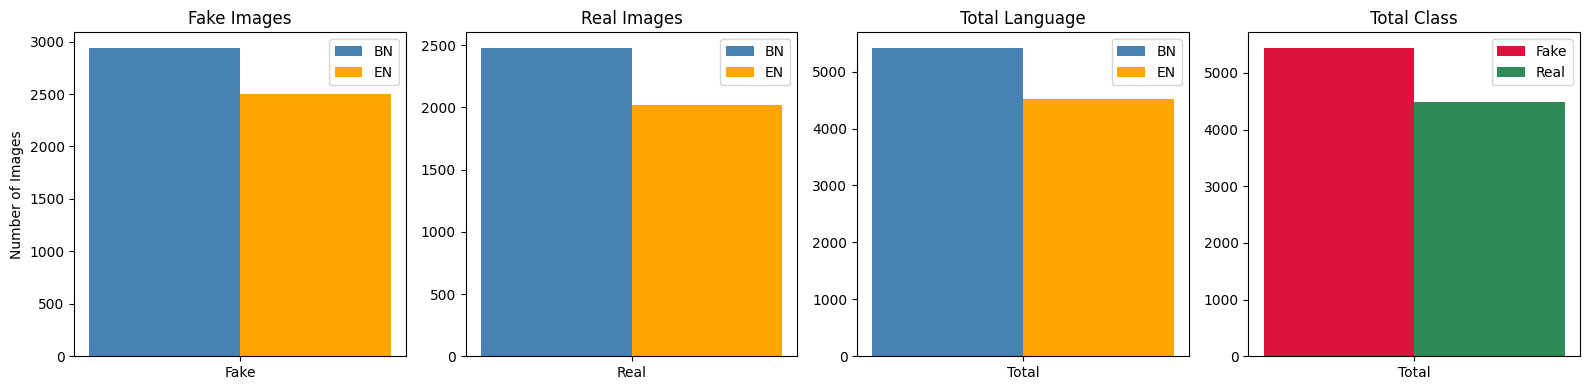

In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Count images
# -------------------------
def count_images(data_dir):
    counts = {
        "fake": {"BN": 0, "EN": 0},
        "real": {"BN": 0, "EN": 0}
    }

    for label in ["fake", "real"]:
        for lang, folder_name in [("BN", "BN_image"), ("EN", "EN_image")]:
            folder = os.path.join(data_dir, label, folder_name)
            if os.path.exists(folder):
                counts[label][lang] = len(os.listdir(folder))

    return counts

counts = count_images(IMG_DATA_DIR)

# -------------------------
# Values for plots
# -------------------------
fake_bn, fake_en = counts["fake"]["BN"], counts["fake"]["EN"]
real_bn, real_en = counts["real"]["BN"], counts["real"]["EN"]

bn_total = fake_bn + real_bn
en_total = fake_en + real_en

fake_total = fake_bn + fake_en
real_total = real_bn + real_en

width = 0.35

# -------------------------
# Create 1x4 subplots
# -------------------------
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# 1️⃣ Fake: BN vs EN
axes[0].bar(-width/2, fake_bn, width, color="steelblue", label="BN")
axes[0].bar(width/2, fake_en, width, color="orange", label="EN")
axes[0].set_title("Fake Images")
axes[0].set_xticks([0])
axes[0].set_xticklabels(["Fake"])
axes[0].set_ylabel("Number of Images")
axes[0].legend()

# 2️⃣ Real: BN vs EN
axes[1].bar(-width/2, real_bn, width, color="steelblue", label="BN")
axes[1].bar(width/2, real_en, width, color="orange", label="EN")
axes[1].set_title("Real Images")
axes[1].set_xticks([0])
axes[1].set_xticklabels(["Real"])
axes[1].legend()

# 3️⃣ Total language: BN vs EN
axes[2].bar(-width/2, bn_total, width, color="steelblue", label="BN")
axes[2].bar(width/2, en_total, width, color="orange", label="EN")
axes[2].set_title("Total Language")
axes[2].set_xticks([0])
axes[2].set_xticklabels(["Total"])
axes[2].legend()

# 4️⃣ Total class: Fake vs Real
axes[3].bar(-width/2, fake_total, width, color="crimson", label="Fake")
axes[3].bar(width/2, real_total, width, color="seagreen", label="Real")
axes[3].set_title("Total Class")
axes[3].set_xticks([0])
axes[3].set_xticklabels(["Total"])
axes[3].legend()

plt.tight_layout()
plt.show()


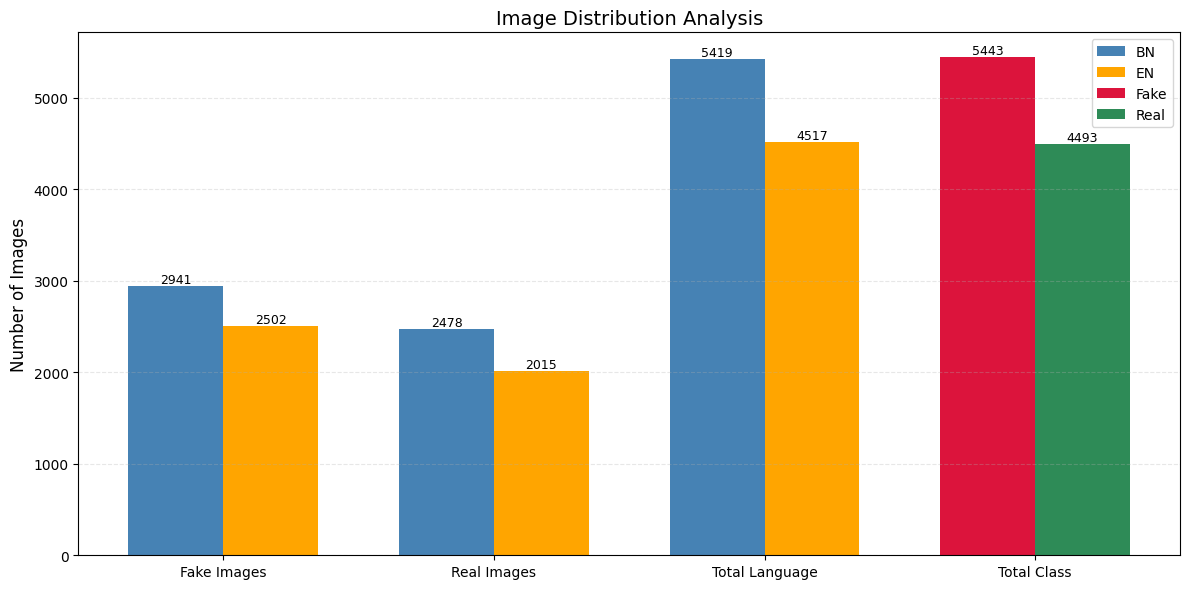

In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Count images
# -------------------------
def count_images(data_dir):
    counts = {
        "fake": {"BN": 0, "EN": 0},
        "real": {"BN": 0, "EN": 0}
    }
    for label in ["fake", "real"]:
        for lang, folder_name in [("BN", "BN_image"), ("EN", "EN_image")]:
            folder = os.path.join(data_dir, label, folder_name)
            if os.path.exists(folder):
                counts[label][lang] = len(os.listdir(folder))
    return counts

counts = count_images(IMG_DATA_DIR)

# -------------------------
# Values for plots
# -------------------------
fake_bn, fake_en = counts["fake"]["BN"], counts["fake"]["EN"]
real_bn, real_en = counts["real"]["BN"], counts["real"]["EN"]
bn_total = fake_bn + real_bn
en_total = fake_en + real_en
fake_total = fake_bn + fake_en
real_total = real_bn + real_en

# -------------------------
# Data for grouped bar chart
# -------------------------
categories = ['Fake Images', 'Real Images', 'Total Language', 'Total Class']
bn_values = [fake_bn, real_bn, bn_total, 0]
en_values = [fake_en, real_en, en_total, 0]
fake_values = [0, 0, 0, fake_total]
real_values = [0, 0, 0, real_total]

x = np.arange(len(categories))
width = 0.35

# -------------------------
# Create single grouped bar chart
# -------------------------
fig, ax = plt.subplots(figsize=(12, 6))

# Create bars for each category
bars1 = ax.bar(x[0] - width/2, bn_values[0], width, color='steelblue', label='BN')
bars2 = ax.bar(x[0] + width/2, en_values[0], width, color='orange', label='EN')

bars3 = ax.bar(x[1] - width/2, bn_values[1], width, color='steelblue')
bars4 = ax.bar(x[1] + width/2, en_values[1], width, color='orange')

bars5 = ax.bar(x[2] - width/2, bn_values[2], width, color='steelblue')
bars6 = ax.bar(x[2] + width/2, en_values[2], width, color='orange')

bars7 = ax.bar(x[3] - width/2, fake_total, width, color='crimson', label='Fake')
bars8 = ax.bar(x[3] + width/2, real_total, width, color='seagreen', label='Real')

# Add value labels on bars
all_bars = [bars1, bars2, bars3, bars4, bars5, bars6, bars7, bars8]
for bars in all_bars:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}',
                    ha='center', va='bottom', fontsize=9)

# Customize chart
ax.set_ylabel('Number of Images', fontsize=12)
ax.set_title('Image Distribution Analysis', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig("/kaggle/working/Image_Distribution.png", dpi=300, bbox_inches='tight')
plt.show()

## Text Distribution Analysis

In [15]:
df = pd.read_csv(TXT_DATA_PATH)
print(f"Loaded {len(df)} rows")

Loaded 9954 rows


In [16]:
df = df.drop_duplicates().reset_index(drop=True)

In [17]:
df['label'].value_counts()

label
fake    5447
real    4507
Name: count, dtype: int64

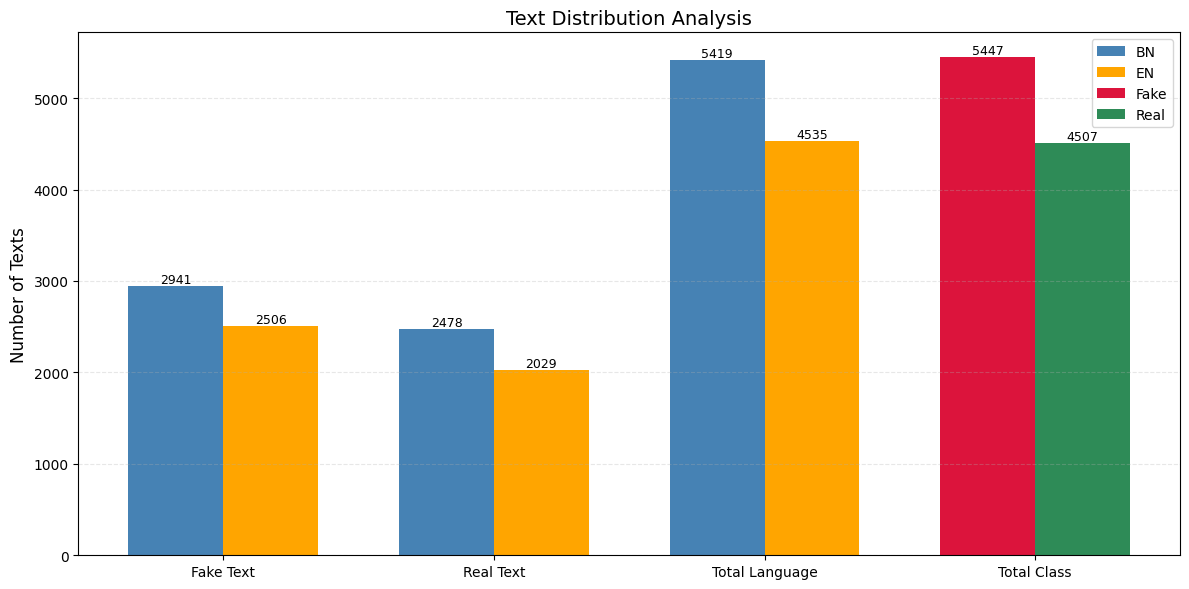

In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt
import re

# -------------------------
# Extract language from path
# -------------------------
def extract_language(path):
    if '/BN_text/' in path:
        return 'BN'
    elif '/EN_text/' in path:
        return 'EN'
    else:
        return 'Other'

df['language'] = df['image_path'].apply(extract_language)

# Use only BN & EN
df_plot = df[df['language'].isin(['BN','EN'])]

# -------------------------
# Count text data
# -------------------------
fake_bn = len(df_plot[(df_plot['label'] == 'fake') & (df_plot['language'] == 'BN')])
fake_en = len(df_plot[(df_plot['label'] == 'fake') & (df_plot['language'] == 'EN')])
real_bn = len(df_plot[(df_plot['label'] == 'real') & (df_plot['language'] == 'BN')])
real_en = len(df_plot[(df_plot['label'] == 'real') & (df_plot['language'] == 'EN')])

bn_total = fake_bn + real_bn
en_total = fake_en + real_en
fake_total = fake_bn + fake_en
real_total = real_bn + real_en

# -------------------------
# Data for grouped bar chart
# -------------------------
categories = ['Fake Text', 'Real Text', 'Total Language', 'Total Class']

x = np.arange(len(categories))
width = 0.35

# -------------------------
# Create single grouped bar chart
# -------------------------
fig, ax = plt.subplots(figsize=(12, 6))

# Create bars for each category
bars1 = ax.bar(x[0] - width/2, fake_bn, width, color='steelblue', label='BN')
bars2 = ax.bar(x[0] + width/2, fake_en, width, color='orange', label='EN')

bars3 = ax.bar(x[1] - width/2, real_bn, width, color='steelblue')
bars4 = ax.bar(x[1] + width/2, real_en, width, color='orange')

bars5 = ax.bar(x[2] - width/2, bn_total, width, color='steelblue')
bars6 = ax.bar(x[2] + width/2, en_total, width, color='orange')

bars7 = ax.bar(x[3] - width/2, fake_total, width, color='crimson', label='Fake')
bars8 = ax.bar(x[3] + width/2, real_total, width, color='seagreen', label='Real')

# Add value labels on bars
all_bars = [bars1, bars2, bars3, bars4, bars5, bars6, bars7, bars8]
for bars in all_bars:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}',
                    ha='center', va='bottom', fontsize=9)

# Customize chart
ax.set_ylabel('Number of Texts', fontsize=12)
ax.set_title('Text Distribution Analysis', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig("/kaggle/working/Text_Distribution.png", dpi=300, bbox_inches='tight')
plt.show()

## Distribution of the multimodal fake news dataset across class (fake, real), language (BN, EN), and modality (image, text)

In [22]:
# -------------------------
# IMAGE COUNTS
# -------------------------
img_fake_bn = counts["fake"]["BN"]
img_fake_en = counts["fake"]["EN"]
img_real_bn = counts["real"]["BN"]
img_real_en = counts["real"]["EN"]

# -------------------------
# TEXT COUNTS (from df)
# -------------------------
txt_fake_bn = fake_bn
txt_fake_en = fake_en
txt_real_bn = real_bn
txt_real_en = real_en


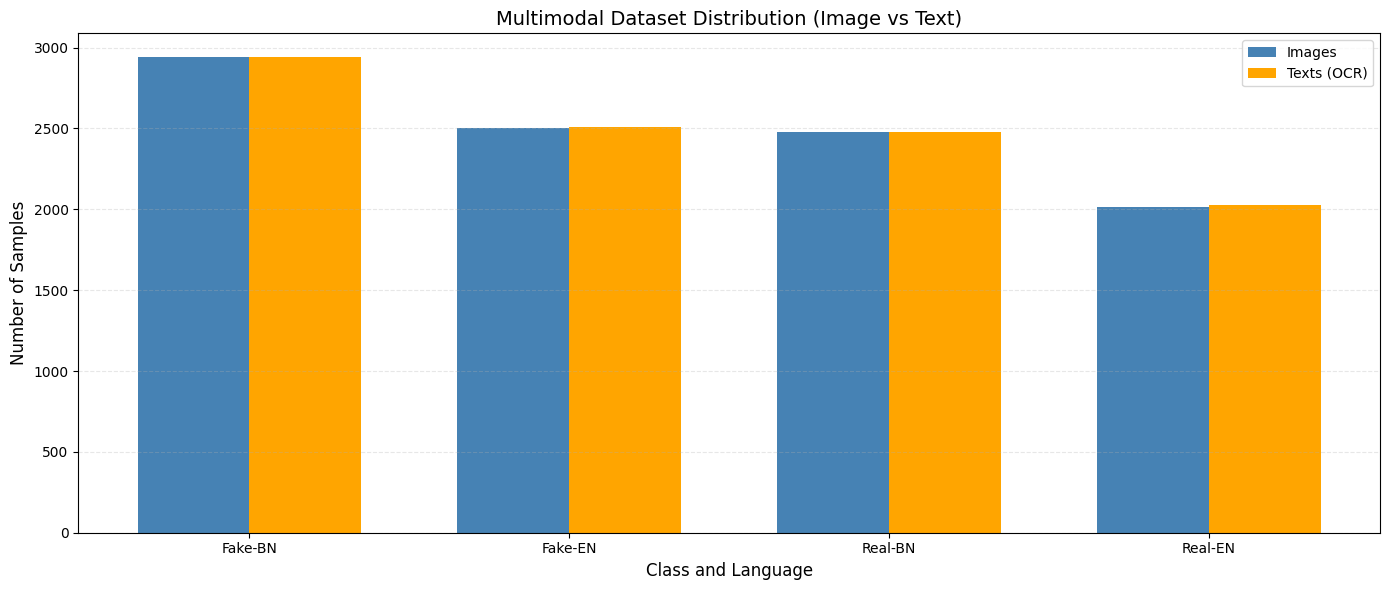

In [26]:
import numpy as np
import matplotlib.pyplot as plt

categories = [
    "Fake-BN", "Fake-EN",
    "Real-BN", "Real-EN"
]

image_values = [
    img_fake_bn, img_fake_en,
    img_real_bn, img_real_en
]

text_values = [
    txt_fake_bn, txt_fake_en,
    txt_real_bn, txt_real_en
]

x = np.arange(len(categories))
width = 0.35

plt.figure(figsize=(14, 6))

plt.bar(x - width/2, image_values, width,
        label="Images", color="steelblue")

plt.bar(x + width/2, text_values, width,
        label="Texts (OCR)", color="orange")

plt.xlabel("Class and Language", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.title("Multimodal Dataset Distribution (Image vs Text)", fontsize=14)

plt.xticks(x, categories)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig("/kaggle/working/multimodal_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


##  Image and Text Distribution Analysis in two rows

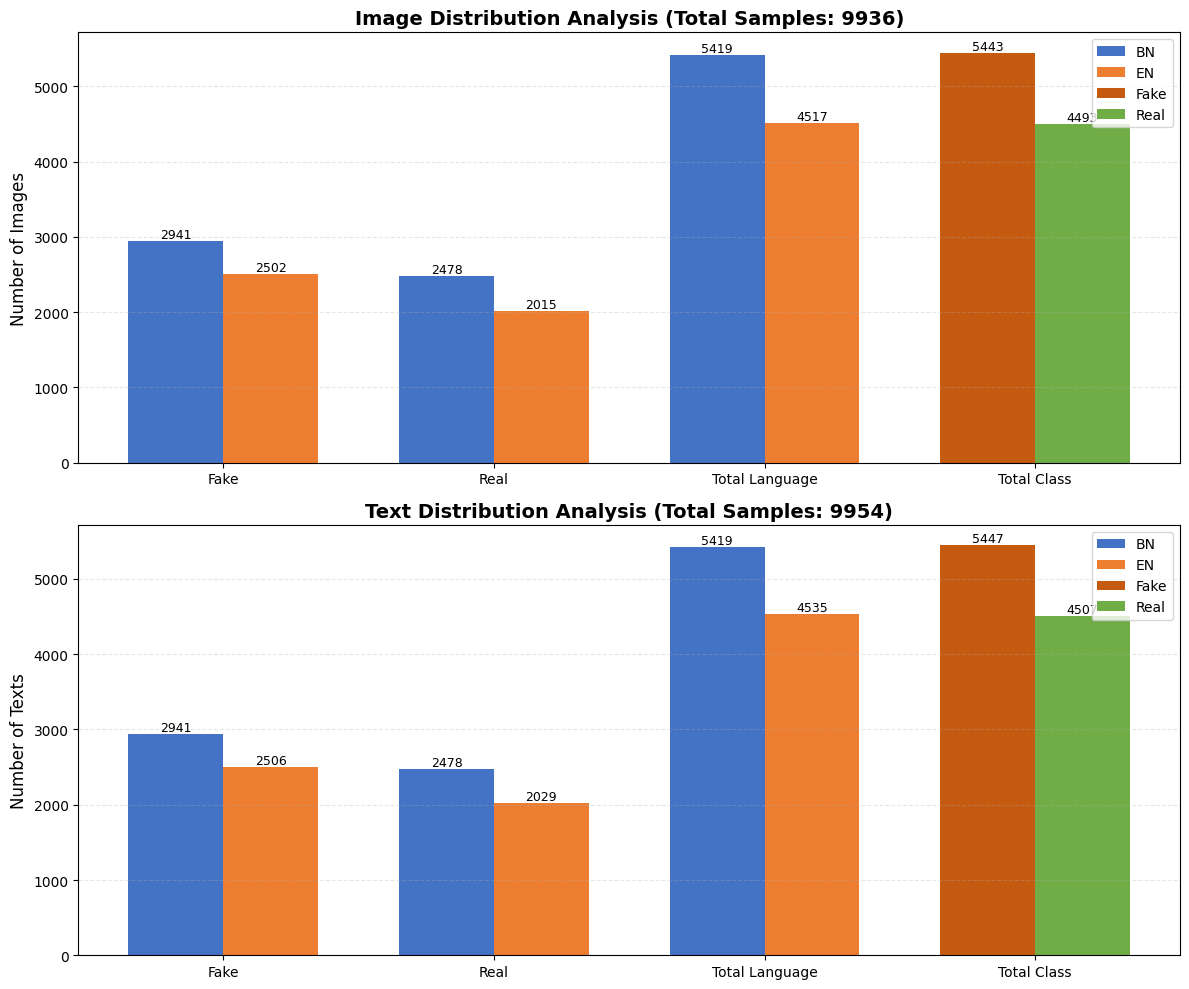

In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
import re

# -------------------------
# Count images
# -------------------------
def count_images(data_dir):
    counts = {
        "fake": {"BN": 0, "EN": 0},
        "real": {"BN": 0, "EN": 0}
    }
    for label in ["fake", "real"]:
        for lang, folder_name in [("BN", "BN_image"), ("EN", "EN_image")]:
            folder = os.path.join(data_dir, label, folder_name)
            if os.path.exists(folder):
                counts[label][lang] = len(os.listdir(folder))
    return counts

counts = count_images(IMG_DATA_DIR)

# -------------------------
# Values for images
# -------------------------
fake_bn_img, fake_en_img = counts["fake"]["BN"], counts["fake"]["EN"]
real_bn_img, real_en_img = counts["real"]["BN"], counts["real"]["EN"]
bn_total_img = fake_bn_img + real_bn_img
en_total_img = fake_en_img + real_en_img
fake_total_img = fake_bn_img + fake_en_img
real_total_img = real_bn_img + real_en_img

# -------------------------
# Extract language from path for text
# -------------------------
def extract_language(path):
    if '/BN_text/' in path:
        return 'BN'
    elif '/EN_text/' in path:
        return 'EN'
    else:
        return 'Other'

df['language'] = df['image_path'].apply(extract_language)

# Use only BN & EN
df_plot = df[df['language'].isin(['BN','EN'])]

# -------------------------
# Count text data
# -------------------------
fake_bn_txt = len(df_plot[(df_plot['label'] == 'fake') & (df_plot['language'] == 'BN')])
fake_en_txt = len(df_plot[(df_plot['label'] == 'fake') & (df_plot['language'] == 'EN')])
real_bn_txt = len(df_plot[(df_plot['label'] == 'real') & (df_plot['language'] == 'BN')])
real_en_txt = len(df_plot[(df_plot['label'] == 'real') & (df_plot['language'] == 'EN')])
bn_total_txt = fake_bn_txt + real_bn_txt
en_total_txt = fake_en_txt + real_en_txt
fake_total_txt = fake_bn_txt + fake_en_txt
real_total_txt = real_bn_txt + real_en_txt

# -------------------------
# Create figure with 2 rows
# -------------------------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

categories = ['Fake', 'Real', 'Total Language', 'Total Class']
x = np.arange(len(categories))
width = 0.35

# -------------------------
# ROW 1: IMAGE ANALYSIS
# -------------------------
# Fake Images
bars1 = ax1.bar(x[0] - width/2, fake_bn_img, width, color='#4472C4', label='BN')
bars2 = ax1.bar(x[0] + width/2, fake_en_img, width, color='#ED7D31', label='EN')

# Real Images
bars3 = ax1.bar(x[1] - width/2, real_bn_img, width, color='#4472C4')
bars4 = ax1.bar(x[1] + width/2, real_en_img, width, color='#ED7D31')

# Total Language
bars5 = ax1.bar(x[2] - width/2, bn_total_img, width, color='#4472C4')
bars6 = ax1.bar(x[2] + width/2, en_total_img, width, color='#ED7D31')

# Total Class
bars7 = ax1.bar(x[3] - width/2, fake_total_img, width, color='#C55A11', label='Fake')
bars8 = ax1.bar(x[3] + width/2, real_total_img, width, color='#70AD47', label='Real')

# Add value labels for images
all_bars_img = [bars1, bars2, bars3, bars4, bars5, bars6, bars7, bars8]
for bars in all_bars_img:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}',
                    ha='center', va='bottom', fontsize=9)

total_image_samples = bn_total_img + en_total_img
# Customize image chart
ax1.set_ylabel('Number of Images', fontsize=12)
ax1.set_title(f'Image Distribution Analysis (Total Samples: {total_image_samples})', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.legend(loc='upper right')
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# -------------------------
# ROW 2: TEXT ANALYSIS
# -------------------------
# Fake Text
bars9 = ax2.bar(x[0] - width/2, fake_bn_txt, width, color='#4472C4', label='BN')
bars10 = ax2.bar(x[0] + width/2, fake_en_txt, width, color='#ED7D31', label='EN')

# Real Text
bars11 = ax2.bar(x[1] - width/2, real_bn_txt, width, color='#4472C4')
bars12 = ax2.bar(x[1] + width/2, real_en_txt, width, color='#ED7D31')

# Total Language
bars13 = ax2.bar(x[2] - width/2, bn_total_txt, width, color='#4472C4')
bars14 = ax2.bar(x[2] + width/2, en_total_txt, width, color='#ED7D31')

# Total Class
bars15 = ax2.bar(x[3] - width/2, fake_total_txt, width, color='#C55A11', label='Fake')
bars16 = ax2.bar(x[3] + width/2, real_total_txt, width, color='#70AD47', label='Real')

# Add value labels for text
all_bars_txt = [bars9, bars10, bars11, bars12, bars13, bars14, bars15, bars16]
for bars in all_bars_txt:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}',
                    ha='center', va='bottom', fontsize=9)

total_text_samples = bn_total_txt + en_total_txt

# Customize text chart
ax2.set_ylabel('Number of Texts', fontsize=12)
ax2.set_title(f'Text Distribution Analysis (Total Samples: {total_text_samples})', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(categories)
ax2.legend(loc='upper right')
ax2.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig("/kaggle/working/FakeNews_Dataset(Image+Text)_Distribution.png", dpi=300, bbox_inches='tight')
plt.show()